# Sleep EEG spectral analyses

## Intoductory notes:
This notebook presents spectral analyses functionality:
* Spectrogram
* PSD per sleep stage
* Topomaps for regular and parametrized spectra per sleep stage
* Additional results such as hypnogram and sleep statistics.

Recommended readings and watchings:
1. [Mike X Cohen: Static spectral analysis](https://youtube.com/playlist?list=PLn0OLiymPak2jxGCbWrcgmXUtt9Lbjj_A)
2. [FOOOF: Topographical analyses with MNE](https://fooof-tools.github.io/fooof/auto_examples/analyses/plot_mne_example.html#topographical-analyses-with-mne)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
from sleepeeg.pipeline import SpectralPipe

### Initialize SpectralPipe object
`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`output_directory` - a directory you want the results to be saved in

`path_to_hypno` - point-per-row type of hypnogram

`hypno_freq` - hypnogram's sampling frequency (visbrain's hypnograms default to 1)

In [2]:
spectral_pipe = SpectralPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\saved_raw\cleaned_new_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


31-Mar-23 16:11:57 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


## Hypnospectrogram

Setting 214732 of 2229773 (9.63%) samples to NaN, retaining 2015041 (90.37%) samples.


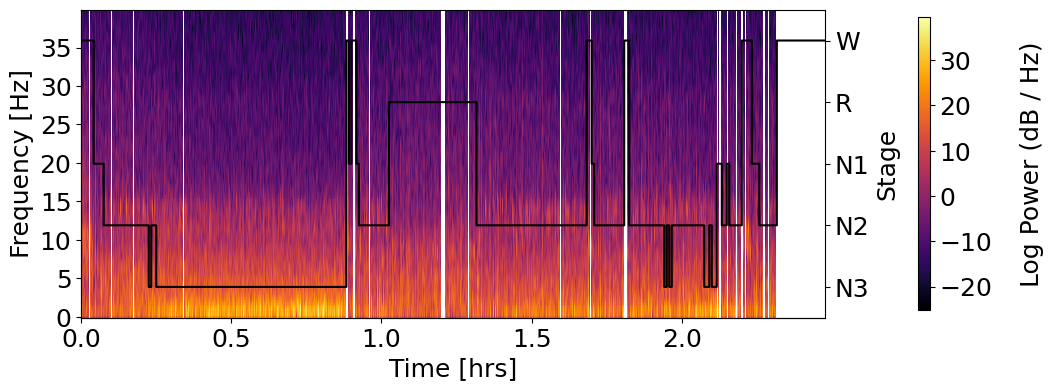

In [3]:
spectral_pipe.plot_hypnospectrogram(
    picks=['E101'],  # Channel[s] to compute spectrogram on.
    sec_per_seg=4.096,  # sec_per_seg = n_per_seg/sampling_frequency
    freq_range=(0,40),  # Y axis limits
    cmap='inferno',  # Matplotlib colormap as in https://matplotlib.org/stable/tutorials/colors/colormaps.html
    overlap=True,  # Whether to plot hypnogram over spectrogram (True) or on top of it (False)
    save=True  # Whether to save the plot as a file.
    )

## Power Spectral Density

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
Setting 214732 of 2229773 (9.63%) samples to NaN, retaining 2015041 (90.37%) samples.


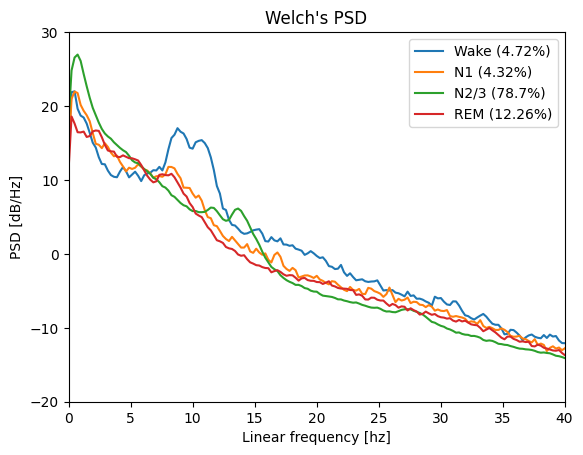

In [4]:
spectral_pipe.plot_psd_per_stage(
    picks=['E101'],  # Channel[s] to run PSD estimation on.
    sec_per_seg=4.096,  # sec_per_seg = n_per_seg/sampling_frequency
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    xscale='linear',  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3' :(2,3), 'REM': 4},  # Sleep stages to calculate PSD on.
    save=True  # Whether to save the plot as a file.
    )

## Topomap

Plots a topomap for one stage and one frequency band

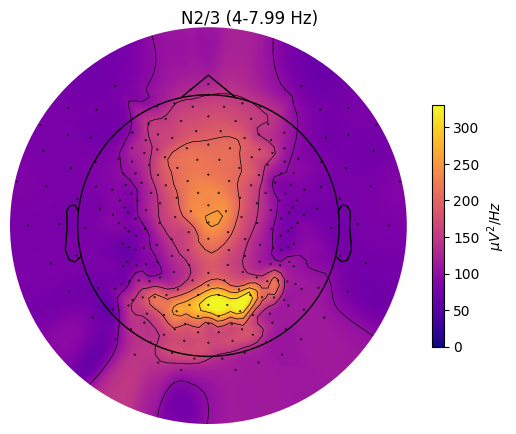

In [10]:
spectral_pipe.plot_topomap_per_stage(
    stage='N2/3',  # Stage to plot topomap for.
    band={"Theta": (4, 7.99)},  # Band to plot topomap for.
    sleep_stages={'N1': 1, 'N2/3': (2,3)},  # Should contain at least index of the provided "stage".
    sec_per_seg=4.096,  # sec_per_seg = n_per_seg/sampling_frequency
    dB=False,  # Whether to transform PSD to dB/Hz
    cmap="plasma",  # Matplotlib colormap
    fooof=False,  # Whether to plot parametrised spectra.
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True  # Whether to save the plot as a file.
)

If you want to recalculate psd_per_stage with differend parameters, e.g., different `dB` or `sec_per_seg`,

delete `psd_per_stage` object from the pipe first and then run the plot again.

In [4]:
del spectral_pipe.psd_per_stage

## Topomap collage
Plot a topomap for multiple bands and sleep_stages

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 192715 of 2229773 (8.64%) samples to NaN, retaining 2037058 (91.36%) samples.


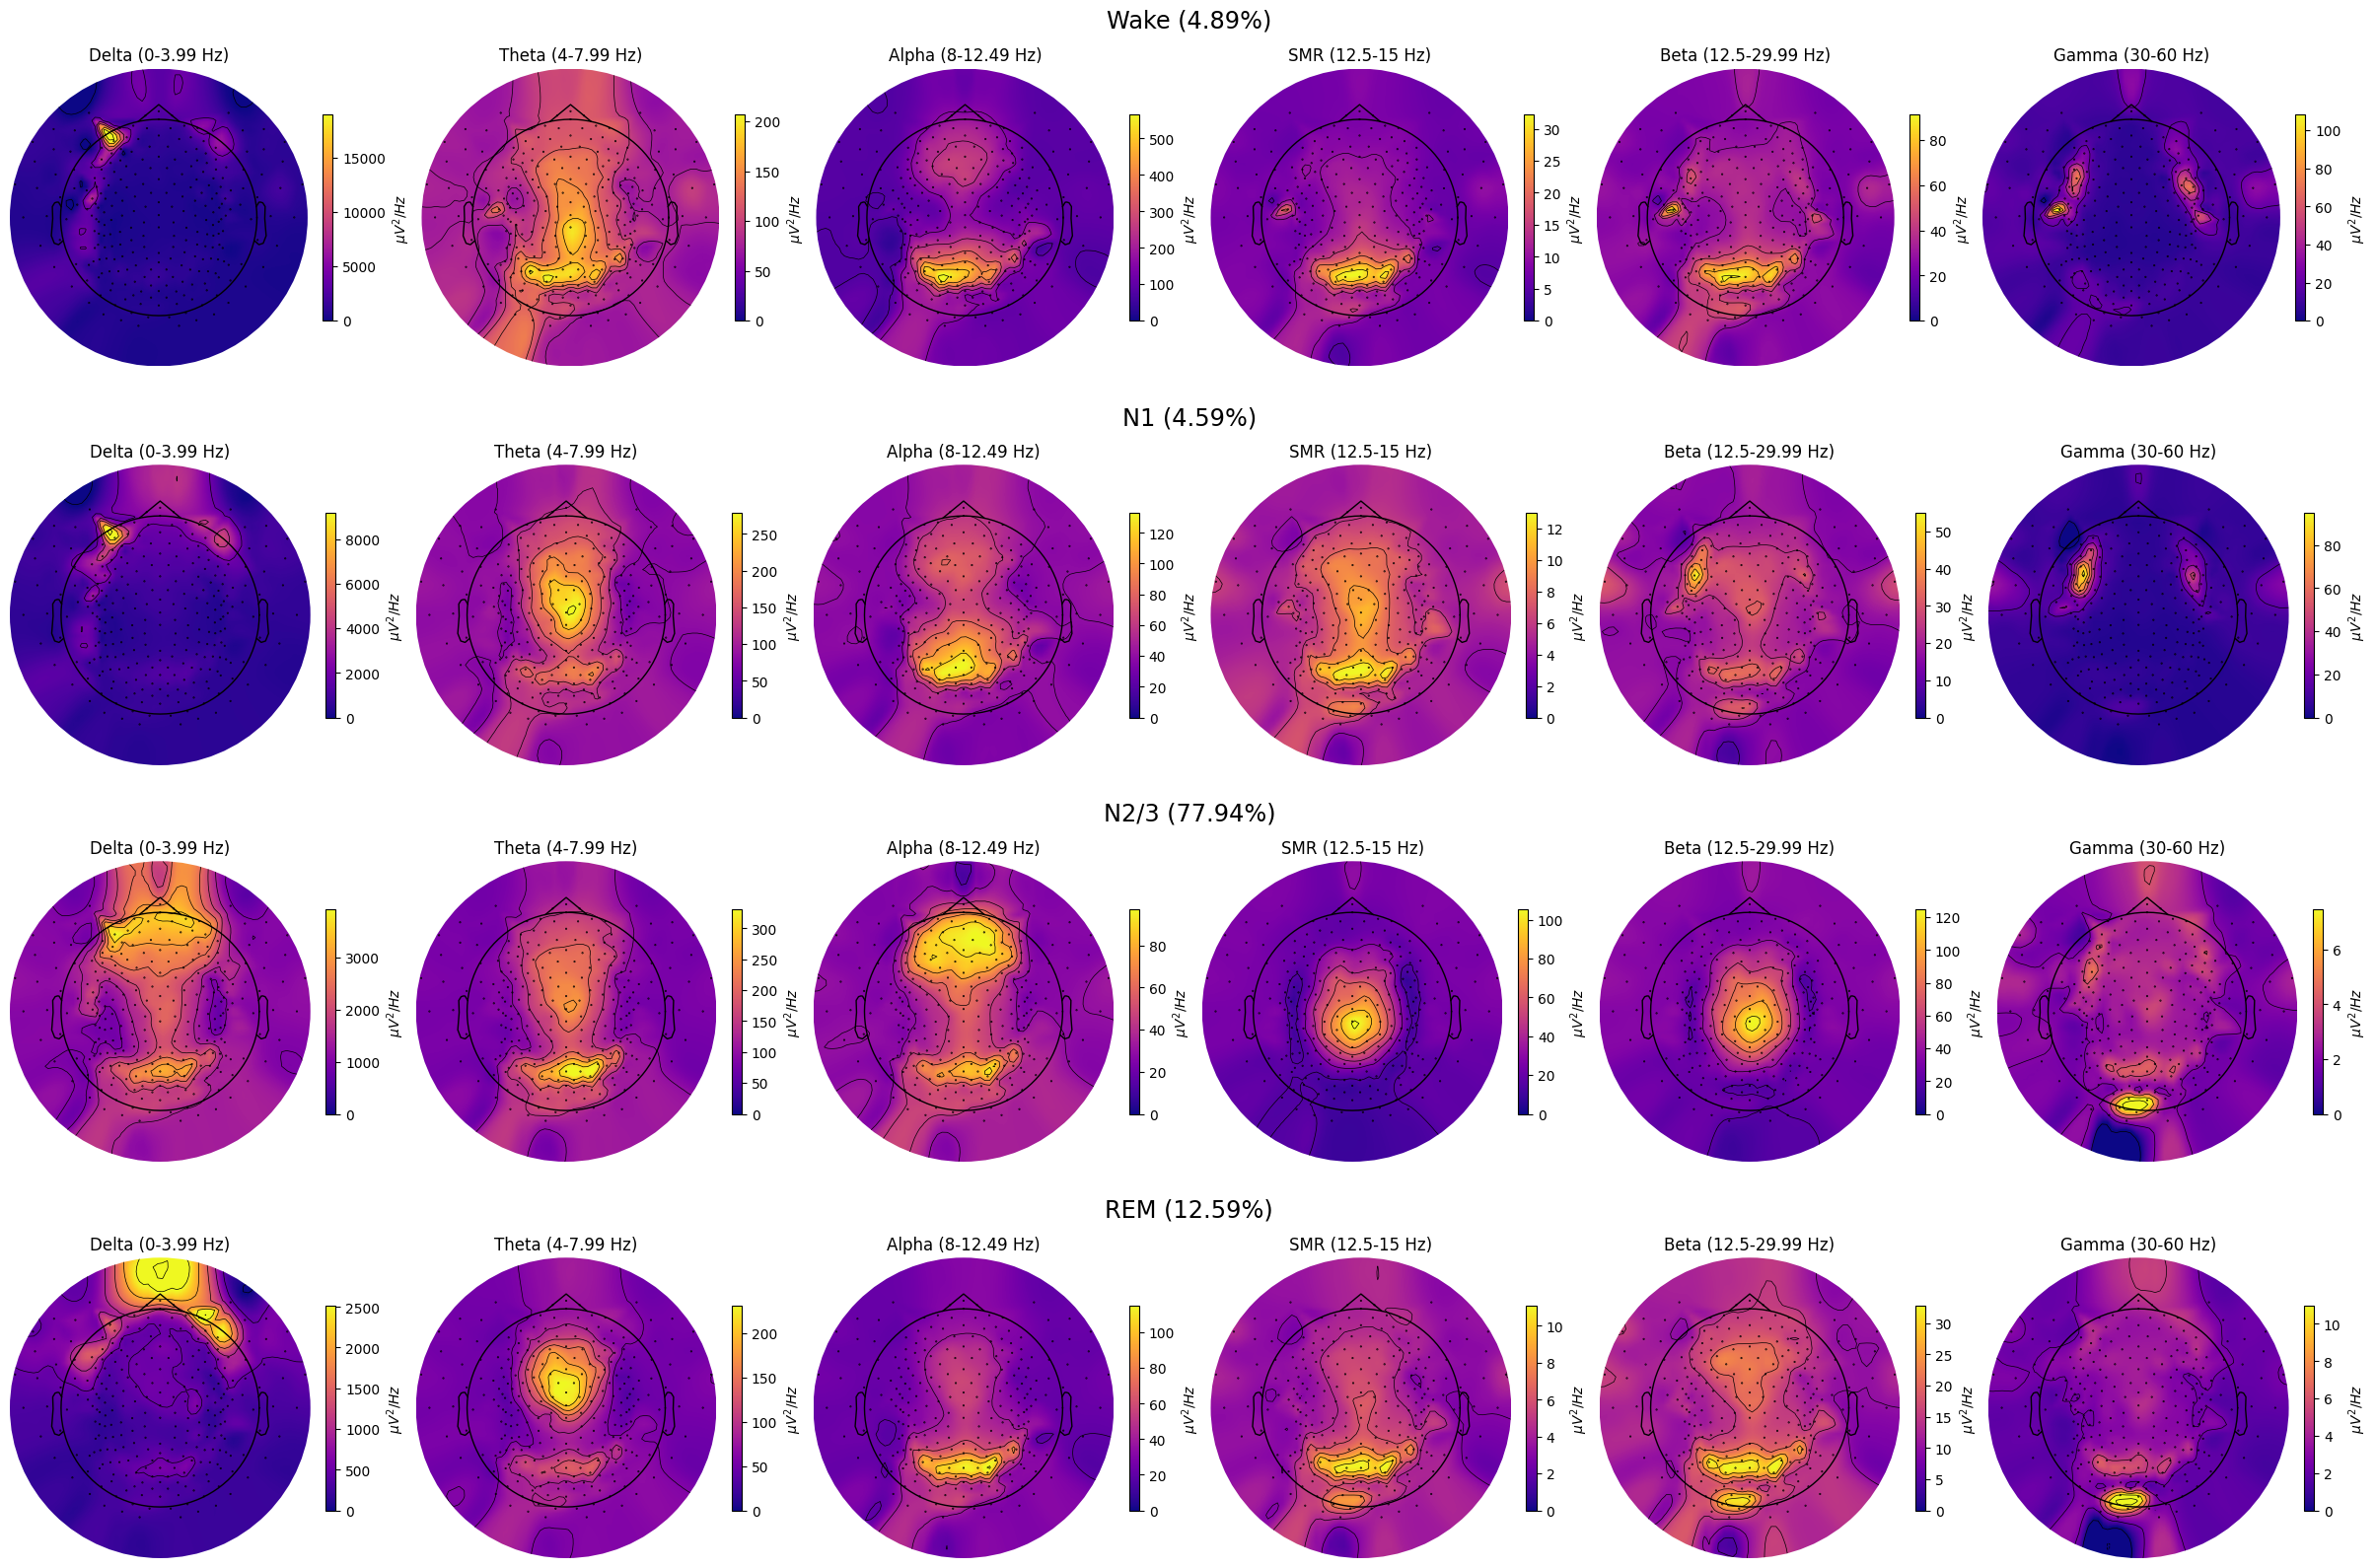

In [6]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3': (2,3), 'REM': 4},  
    sec_per_seg=4.096,  # sec_per_seg = n_per_seg/sampling_frequency
    dB=False,  # Whether to transform PSD to dB/Hz.
    fooof=False,  # Whether to plot parametrised spectra.
    cmap="plasma",  # Matplotlib colormap.
    save=True  # Whether to save the plot as a file.
)

## FOOOF topomap collage

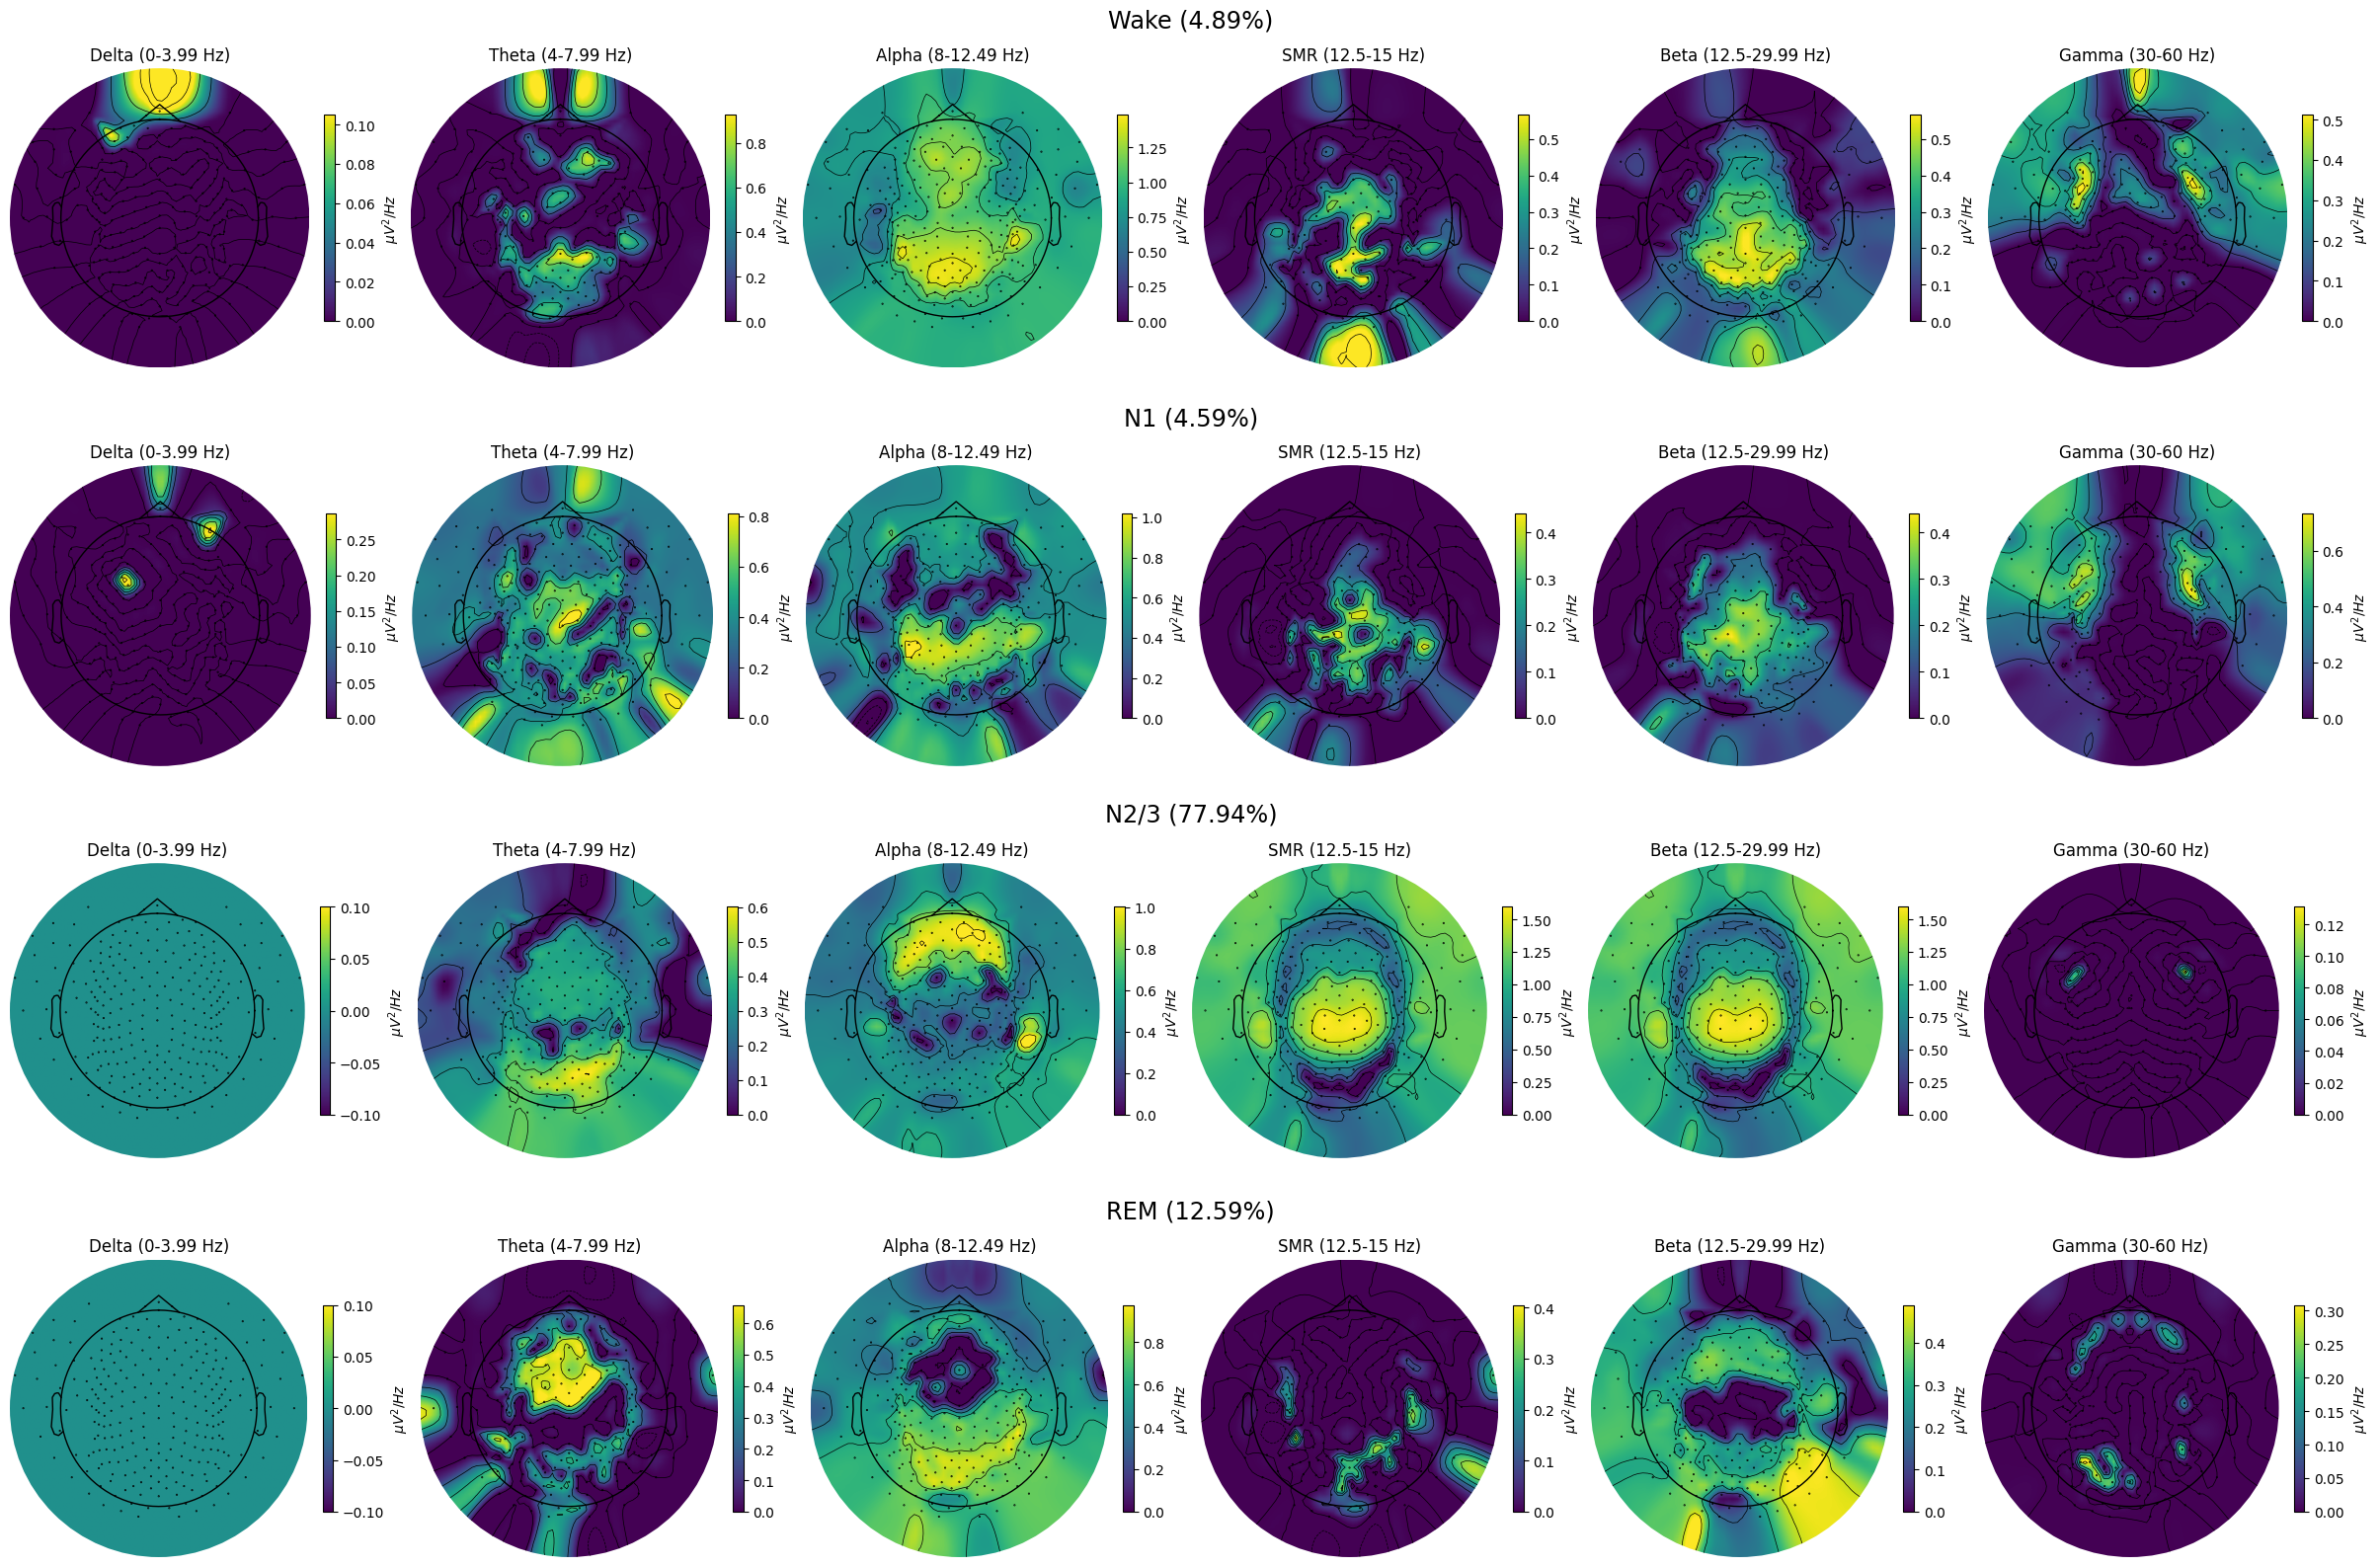

In [7]:
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    # Should contain at least indices of the provided "stages_to_plot".
    sleep_stages={'Wake' :0, 'N1' :1, 'N2/3': (2,3), 'REM': 4},  
    sec_per_seg=4.096,  # sec_per_seg = n_per_seg/sampling_frequency
    dB=False,  # Whether to transform PSD to dB/Hz.
    fooof=True,  # Whether to plot parametrised spectra.
    cmap="viridis",  # Matplotlib colormap.
    save=True  # Whether to save the plot as a file.
)

## Sleep Stats

In [11]:
spectral_pipe.sleep_stats(save=True)